## The Sparks Foundation- #GRIPAPRIL21
## Chetna Sahu
## Task 1- Prediction using Supervised ML
## Problem Statement: Predict the percentage of a student based on the no. of study hours.

In [28]:
# importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [29]:
#reading data using panda
s_data = pd.read_csv('student_scores.csv')

In [30]:
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [31]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualisation

Let's plot our data points on a 2D graph and find any relationship exists between data.

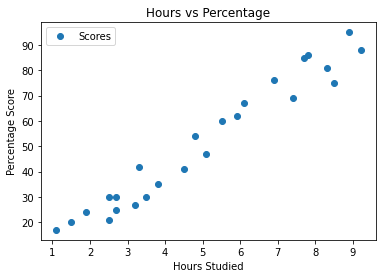

In [32]:
#plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

The next step is the devide the data into input and output.

In [33]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

This shows the data is splits into 80-20 i.e 80% to training and 20% to test.

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [36]:
X_train, X_test

(array([[3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]]))

In [37]:
y_train, y_test

(array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
        54, 95, 41], dtype=int64),
 array([20, 27, 69, 30, 62], dtype=int64))

## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [38]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [39]:
#plotting the regression line
line = reg.coef_*X+reg.intercept_
print(reg.intercept_)
print(reg.coef_)

2.018160041434683
[9.91065648]


This means that if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously i.e for every one unit of change in hours studied, the change in the score is about 9.91%

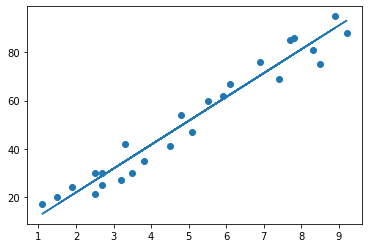

In [40]:
# Plotting the graph
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Prediction

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [41]:
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
hours= 9.25
my_pred = reg.predict(np.array([9.25]).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


If a student will study 9.25 hours per day, he/she will score 94(approx) marks.

## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For this,we will use the root mean square error.

In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


We can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. So our model is the best fitted model.